In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score
import math
%matplotlib inline

In [2]:
data=pd.read_csv("headbrain.csv")

In [3]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
data.shape

(237, 4)

# Simple Linear Regression (using one feature) to predict brain weight from brain size.

In [6]:
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values

# Model Explanation

Y=b0+b1(x) <br>
where b1=( ∑(xi-xm)(yi-ym) )/ ∑(xi-xm)^2 <br>
b0= ym - b1xm  <br>

xm-> mean(x) <br>
ym-> mean(y) <br>


In [38]:
def calculateCoeff(x,y):
    xm=x.mean()
    ym=y.mean()
    numerator=0
    denominator=0
    print("Mean of X value: ",xm,"\t Mean of Y values: ",ym)
    for i in range(x.shape[0]):
        numerator+= (x[i]-xm)*(y[i]-ym)
        denominator+= ((x[i] - xm) ** 2)
    
    b1=numerator/denominator
    b0=ym- b1 * (xm)  
    print("Coefficient b0: ",b0,"\t Coefficient b1: ",b1)
    return [b0,b1]

In [52]:
def plotRegression(x,y,coeff):
    plt.scatter(x,y,color='b')
    y_Pred=coeff[1]*x + coeff[0]
    plt.plot(x,y_Pred,color='g')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    exVar=explained_variance_score(y,y_Pred)
    print("The model is able to explain ",exVar*100,"% of variance in y due to x")
    print("The root mean squared error: ",mean_squared_error(y,y_Pred)**.5)
    print("R^2 metric: ",r2_score(y,y_Pred))
    

Mean of X value:  3633.99156118 	 Mean of Y values:  1282.87341772
Coefficient b0:  325.573421049 	 Coefficient b1:  0.263429339489


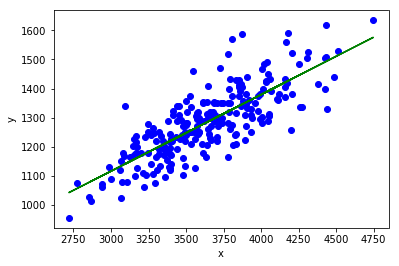

The model is able to explain  63.9311719957 % of variance in y due to x
The root mean squared error:  72.1206213784
R^2 metric:  0.639311719957


In [53]:
coeff=calculateCoeff(x,y)
plotRegression(x,y,coeff)

# Multiple Linear Regression

# Model Explanation

Y= b0 +b1x1 + b2x2 + .... + bnxn <br>
bi -> ith parameters <br>
xi -> ith feature <br>

Thus, Y= bTx <br>
bT ->transpose of matrix conatining learned parameters <br>

Y= hbx (Predicted y) where hbx = b0(1) + b1x1+ .... + bnxn <br>
y= true value <br>
Error = (1/2n) * ∑(Y - y)^2


# Gradient Descent 

* Initialize all parameters to random values. 
* Update each parameter (bj) using bj := bj - alpha( d (Error)/dbj)
* Repeat until the values of parameters (bj) cease to change by large steps. <br> <br>
alpha : learning parameter which can be adjusted to increase or decrease the steps of shift. If it is too large, the most optimal value (minima) of the parameter can be missed. If it is too small the learning time can increase.  <br>
Step two of GD can be done using batch or stochastic method. For reference to how one is better than the other  [refer this](https://stats.stackexchange.com/questions/49528/batch-gradient-descent-versus-stochastic-gradient-descent)

In [289]:
data=pd.read_csv('fram1.csv')

## Data set: Systolic blood pressure data
* SYSBP - > blood pressure
* Age 
* BMI 

In [290]:
data.head()

,SEX,RANDID,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,1,2448,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2,6238,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
2,1,9428,245.0,48,127.5,80.0,1,20.0,25.34,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,2,10552,225.0,61,150.0,95.0,1,30.0,28.58,0,...,1,1,2956,2956,2956,2956,2089,2089,2956,0
4,2,11252,285.0,46,130.0,84.0,1,23.0,23.10,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4285


In [291]:
np.isnan(data).any()

SEX         False
RANDID      False
TOTCHOL      True
AGE         False
SYSBP       False
DIABP       False
CURSMOKE    False
CIGPDAY      True
BMI          True
DIABETES    False
BPMEDS       True
HEARTRTE     True
GLUCOSE      True
PREVCHD     False
PREVAP      False
PREVMI      False
PREVSTRK    False
PREVHYP     False
TIME        False
PERIOD      False
HDLC         True
LDLC         True
DEATH       False
ANGINA      False
HOSPMI      False
MI_FCHD     False
ANYCHD      False
STROKE      False
CVD         False
HYPERTEN    False
TIMEAP      False
TIMEMI      False
TIMEMIFC    False
TIMECHD     False
TIMESTRK    False
TIMECVD     False
TIMEDTH     False
TIMEHYP     False
dtype: bool

In [292]:
data=data[['SYSBP','AGE','BMI']]

In [293]:
data.head()

,SYSBP,AGE,BMI
0,106.0,39,26.97
1,121.0,46,28.73
2,127.5,48,25.34
3,150.0,61,28.58
4,130.0,46,23.10


In [294]:
data=data.dropna()
data.shape

(4415, 3)

In [295]:
bmi=data['BMI'].values
age=data['AGE'].values
ones=np.ones(bmi.shape[0])
x=np.array([ones,age,bmi]).T

In [296]:
x

array([[  1.  ,  39.  ,  26.97],
       [  1.  ,  46.  ,  28.73],
       [  1.  ,  48.  ,  25.34],
       ..., 
       [  1.  ,  52.  ,  21.47],
       [  1.  ,  40.  ,  25.6 ],
       [  1.  ,  39.  ,  20.91]])

In [297]:
lst=np.argwhere(np.isnan(x))
lst

array([], shape=(0, 2), dtype=int64)

In [298]:
for i in lst:
    np.delete(y,[i[0],i[1]])
    
y.shape

(4415,)

In [299]:
y=data['SYSBP'].values

In [300]:
B=np.array([0]*x.shape[1])
B.shape

(3,)

* To remove nan values from a numpy array : x = x[~ numpy.isnan(x)]

In [301]:
def removeisnan(arr):
    arr=arr[~np.isnan(arr)]
    return arr

In [302]:
#cost function
def costFunction(x,y,B):
    numerator=((x.dot(B) -y) ** 2)
    numerator=np.sum(numerator[~np.isnan(numerator)])
    
    J= (numerator) / (2 * x.shape[0])
    return J

In [303]:
print("initial Error value: ",costFunction(x,y,B))

initial Error value:  9080.23502265


In [312]:
def gradientDescent(x,y,B,alpha):
    cost_history=[0]*1000000
    
    for i in range(1000000):
        h=x.dot(B)
        loss=h-y
        gradient=x.T.dot(loss)/x.shape[0]
        B=B-alpha*gradient
        cost=costFunction(x,y,B)
        cost_history[i]=cost
    return B,cost_history

In [313]:
newB,cost_history=gradientDescent(x,y,B,.0001)
print(newB)

[ 36.94426524   1.01826051   1.73963947]


In [314]:
y_Pred=x.dot(newB)
print(cost_history[-1])

192.073220219


In [315]:
y_Pred[:5]

array([ 123.57450174,  133.76409079,  129.903234  ,  148.77705253,
        123.96992056])

In [316]:
print("R2 score: ",r2_score(y,y_Pred))

R2 score:  0.231501337689
